# snATAC-seq - Visualisation and clustering after doublet removal

Blanca Pijuan-Sala

17 April 2019

In [16]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as pl
import scanpy.api as sc
import pandas as pd
import matplotlib.pyplot as plt
import episcanpy.api as epi
import anndata as ad
import numpy as np

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
#Set working directory
wd = '/path/to/directory/sample_pooled_preprocess_revision1/'
direc = wd
sc.settings.figdir = './plots/'
results_file="./write/20190416_snATACseq_embryo_revision01_doublets_cisTopic_50_100.h5ad"


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.15.0 scipy==1.3.0 pandas==0.24.0 scikit-learn==0.20.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


## Read files

In [17]:
adata_all_cells = sc.read("./write/20190416_snATACseq_embryo_revision01_doublets_cisTopic_50_100.h5ad")
adata_all_cells.shape

(23838, 301099)

## colour Palettes

In [23]:
##====== Create colour palette for gene expression profiles ======##

from matplotlib.colors import LinearSegmentedColormap
rmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=['lightgrey', 'thistle', 'red', 'darkred'])

cmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=["#BFBFBF","#6495ED","#000000"])

## Visualise before filtering

In [24]:
sc.pp.neighbors(adata_all_cells)

computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:47)


In [25]:
sc.tl.umap(adata_all_cells,random_state=1)
           #,min_dist=0.3)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:48)


In [ ]:
sc.tl.louvain(adata,resolution=1,random_state=1)

In [26]:

sc.settings.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures


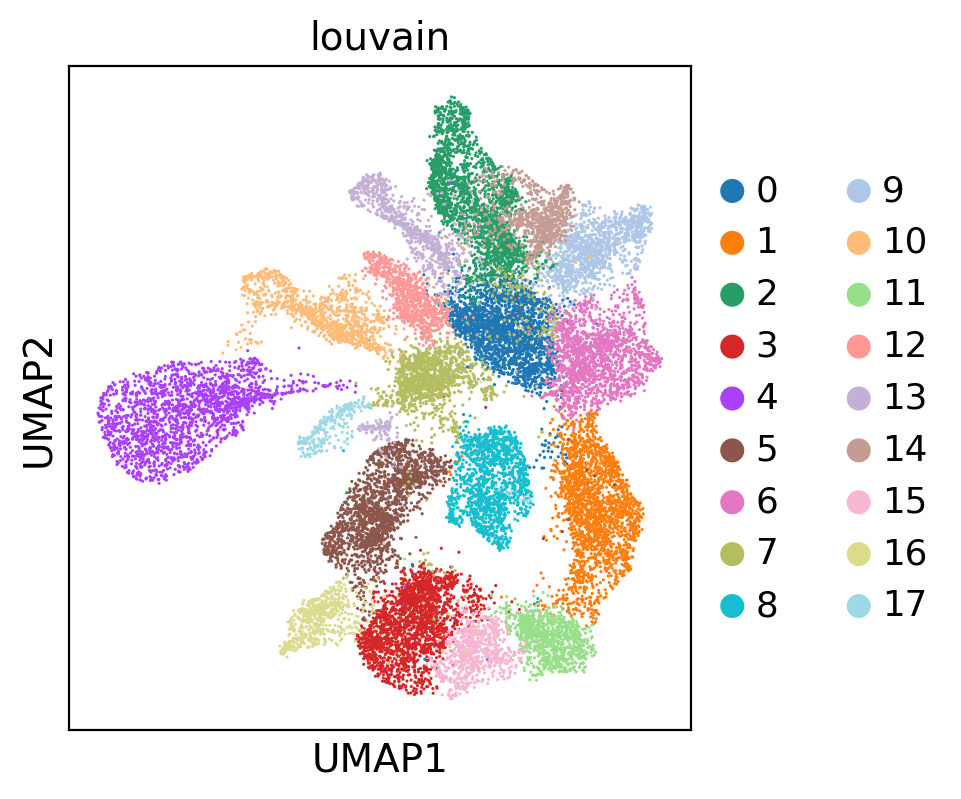

In [27]:
sc.pl.scatter(adata_all_cells,basis="umap",color="louvain")

## Remove doublet clusters

In [20]:
cellsSel = np.unique(adata_all_cells.obs_names[[i > 0.4 for i in adata_all_cells.obs["doublet_scores"]]])
                                               


In [21]:
len(cellsSel)

769

In [22]:
adata = adata_all_cells[np.array([str(i) not in list(cellsSel) for i in adata_all_cells.obs_names]),:]


In [28]:
sc.write(results_file,adata)

# Louvain

In [2]:
adata = sc.read(results_file)


In [47]:
sc.tl.louvain(adata,resolution=1,random_state=1,key_added='louvain_afterDoubletRemoval')


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 19 clusters and added
    'louvain_afterDoubletRemoval', the cluster labels (adata.obs, categorical) (0:00:08)


## Compare Louvain before and after filtering

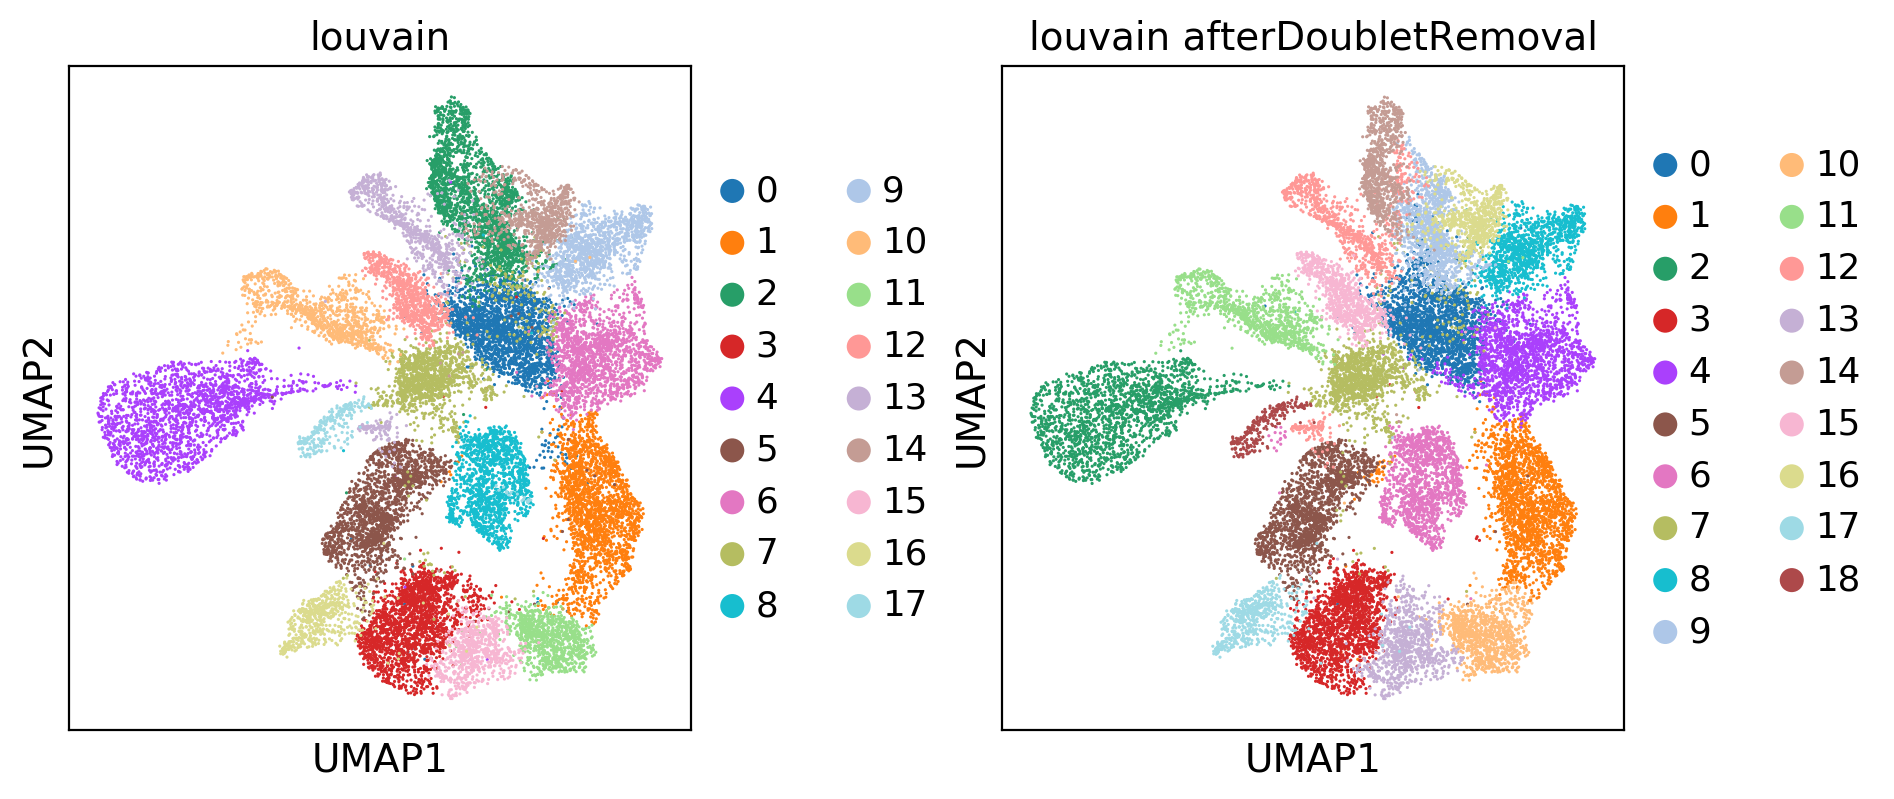

In [49]:
sc.settings.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures

sc.pl.scatter(adata,color=['louvain',"louvain_afterDoubletRemoval"],basis="umap")

In [ ]:
sc.write(results_file,adata)

# Write files

In [ ]:
adata = sc.read(results_file)

In [50]:
#SAVE 256754peaks
#save PCA
PCA = pd.DataFrame(data=adata.obsm['X_pca'])
PCA.to_csv(direc + '07_doublet_removal/data/snATACseq_embryo_revision1_firstQC_afterDoubletRemoval_PCA.csv', sep=',')
#save UMAP
UMAP = pd.DataFrame(data=adata.obsm['X_umap'])
UMAP.to_csv(direc + '07_doublet_removal/data/snATACseq_embryo_revision1_firstQC_afterDoubletRemoval_UMAP.csv', sep=',')
#save clusters

louvain = pd.DataFrame(data=adata.obs['louvain_afterDoubletRemoval'])
louvain.to_csv(direc + '07_doublet_removal/data/snATACseq_embryo_revision1_firstQC_afterDoubletRemoval_Louvain.csv', sep=',')
#save peaks used
Peaks = pd.DataFrame(data=adata.var_names)
Peaks.to_csv(direc + '07_doublet_removal/data/snATACseq_embryo_revision1_firstQC_afterDoubletRemoval_peakNames.csv', sep=',')

In [52]:
meta = pd.DataFrame(data=adata.obs)
meta.to_csv(direc + '07_doublet_removal/data/snATACseq_embryo_revision01_doublets_cisTopic_50_100_metadata_afterDoubletRemoval.csv', sep=',')